In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name =fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

#### 안전 관련 파이차트

In [4]:
def security(name):
    df = pd.read_csv('C:/AcornFinalProject/3. 데이터 전처리 완료/안전/안전_파이차트.csv',encoding='cp949')
    data = df[['cctv 개수', '가로등 개수','범죄 건수']]
    
    labels = ['cctv 개수', '가로등 개수', '범죄 건수']
    data = data[1:2]
    colors = ['#FBDBD1','#EBFAD2','#B5F7CE']

    plt.title(name+'_안전')
    centre_circle = plt.Circle((0,0),0.60,color='white')
    plt.gca().add_artist(centre_circle)
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%',
            wedgeprops = {'linewidth': 3},
            pctdistance = 0.75, shadow=True, startangle = 45)
    plt.axis('equal')
    plt.savefig(name+'_안전.png', format='png', dpi=300)
    return plt.show()

C:\Anaconda3\envs\tf1.15\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


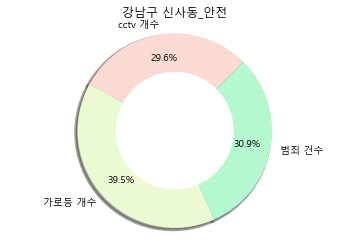

In [5]:
security('강남구 신사동')

#### 교육시설 관련 파이차트

In [6]:
# name : ex) 금천구 독산1동

def school(name):
    df = pd.read_csv('C:/AcornFinalProject/8. 행정동 데이터/학교 2020(행정동, cp949).csv', encoding='cp949')
    df1 = df[df['구 행정동'].str.contains(name)]
    df1 = df1.groupby('학교종류').count().T

    df2 = df1.reset_index(drop=True)[0:1]
    
    labels = df2.columns
    data = df2[0:1]
    
    colors = ['#FBDBD1','#EBFAD2','#B5F7CE','#B8E1F4','#BCBCF0', '#FC9CAC']
    
    plt.title(name+'_교육시설')
    centre_circle = plt.Circle((0,0),0.60,color='white')
    plt.gca().add_artist(centre_circle)
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%',
            wedgeprops = {'linewidth': 3},
            pctdistance = 0.75, startangle = 45)
    plt.axis('equal')
    plt.savefig(name+'_교육.png', format='png', dpi=300)
    return plt.show()

C:\Anaconda3\envs\tf1.15\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


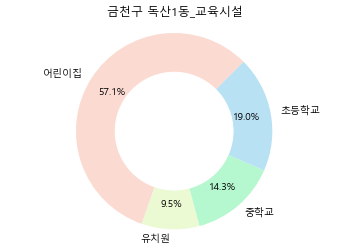

In [7]:
school('금천구 독산1동')

### 교통

In [118]:
def traffic(name):
    bus_df = pd.read_csv('data/pie/버스정류장 2020(행정동, cp949).csv', encoding='cp949')
    bus_df['구 행정동'] = bus_df['구'] + ' ' + bus_df['행정동']
    bus_gu_dong = bus_df['구 행정동'].unique()
    bus_cnt = bus_df['구 행정동'].groupby(bus_df['구 행정동']).count().tolist()
    bus_cnt_df = pd.DataFrame()
    bus_cnt_df['구 행정동'] = bus_gu_dong
    bus_cnt_df['버스정류장'] = bus_cnt
    
    subway_df = pd.read_csv('data/pie/지하철2020(행정동, cp949).csv', encoding='cp949')
    subway_df['구 행정동'] = subway_df['구'] + ' ' + subway_df['행정동']
    subway_gu_dong = subway_df['구 행정동'].unique()
    subway_cnt = subway_df['구 행정동'].groupby(subway_df['구 행정동']).count().tolist()
    subway_cnt_df = pd.DataFrame()
    subway_cnt_df['구 행정동'] = subway_gu_dong
    subway_cnt_df['지하철'] = subway_cnt
    
    gu_dong_df = pd.DataFrame(bus_gu_dong, columns=['구 행정동'])
    sub_df = pd.merge(gu_dong_df, subway_cnt_df, how='left', on='구 행정동')
    sub_df['지하철'] = sub_df['지하철'].fillna(0.0)
    sub_df['지하철'] = sub_df['지하철'].astype('int64')
    
    traffic_data = pd.merge(bus_cnt_df, sub_df, how='left', on='구 행정동').reset_index(drop=True)
    t_data = traffic_data[traffic_data['구 행정동']=='종로구 종로1.2.3.4가동'][['버스정류장', '지하철']]
    
    labels = t_data.columns
    
    colors = ['#FBDBD1','#EBFAD2','#B5F7CE','#B8E1F4','#BCBCF0', '#FC9CAC']
    
    plt.title(name+'_교통')
    centre_circle = plt.Circle((0,0),0.60,color='white')
    plt.gca().add_artist(centre_circle)
    plt.pie(t_data, labels=labels, colors=colors, autopct='%1.1f%%',
            wedgeprops = {'linewidth': 3},
            pctdistance = 0.75, startangle = 45)
    plt.axis('equal')
    plt.savefig(name+'_교통.png', format='png', dpi=300)
    return plt.show()

<ipython-input-118-c3e85d35c4a9>:33: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(t_data, labels=labels, colors=colors, autopct='%1.1f%%',


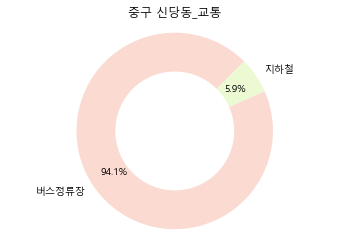

In [119]:
traffic('중구 신당동')

<ipython-input-114-e52818831680>:33: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(t_data, labels=labels, colors=colors, autopct='%1.1f%%',


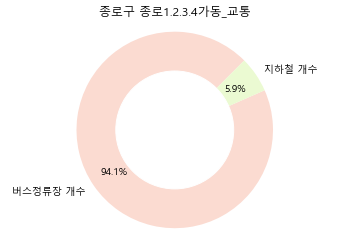

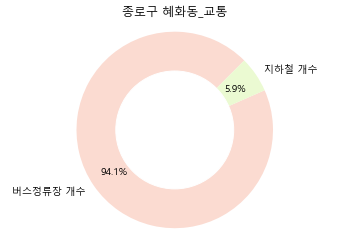

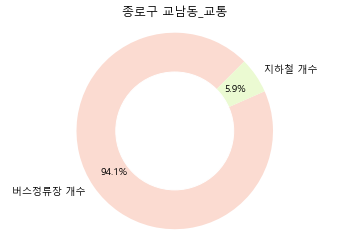

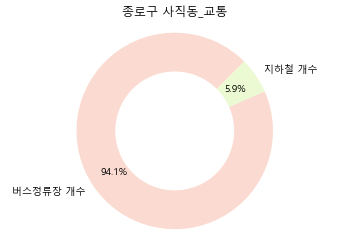

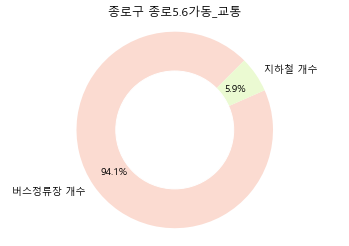

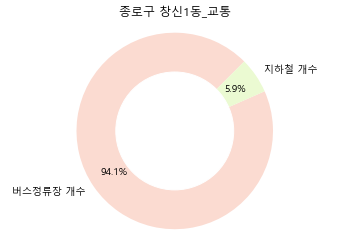

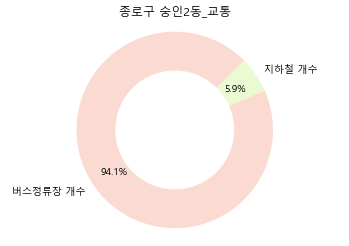

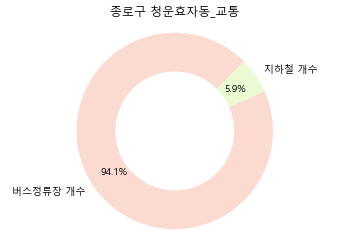

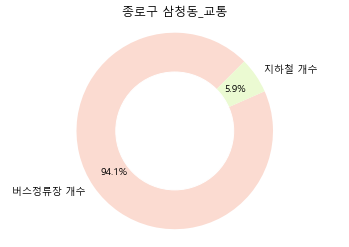

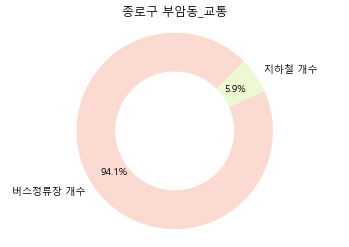

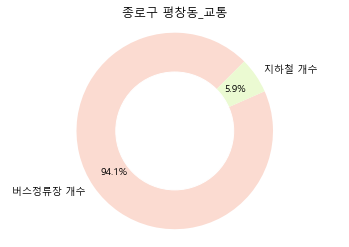

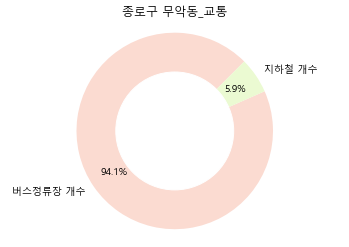

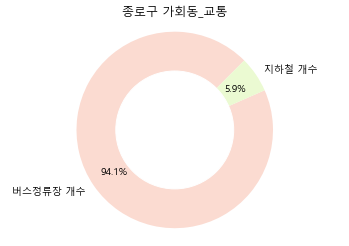

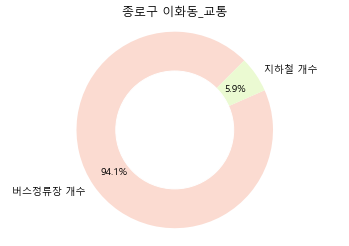

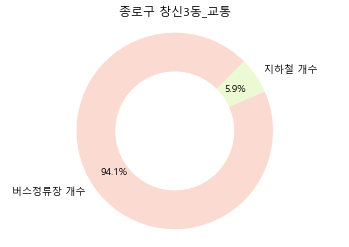

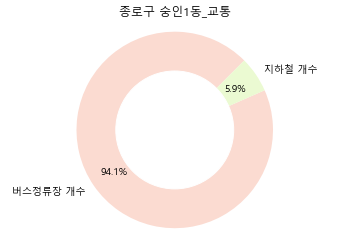

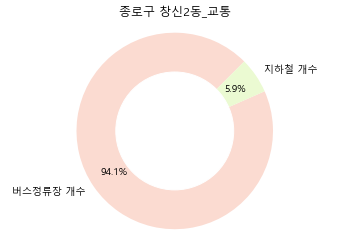

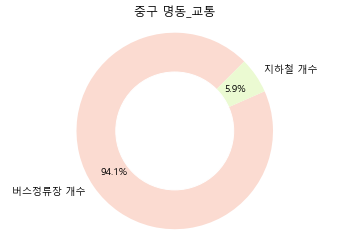

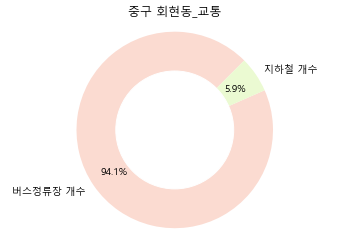

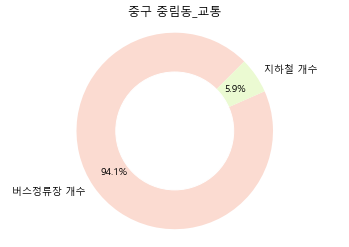

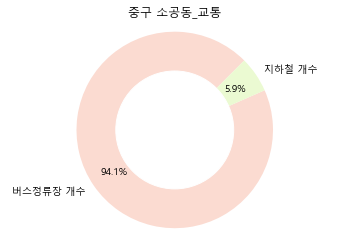

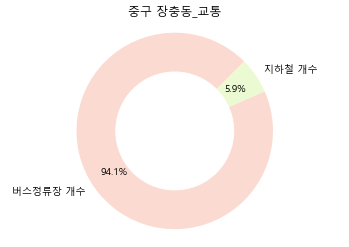

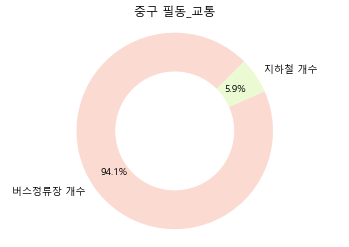

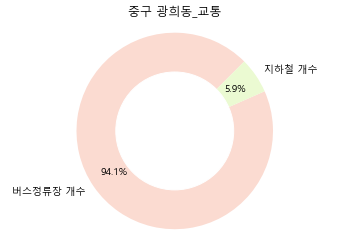

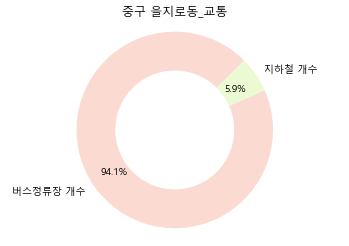

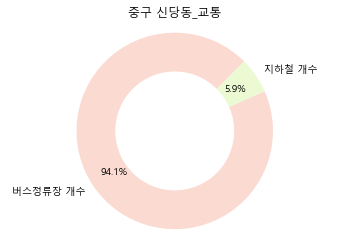

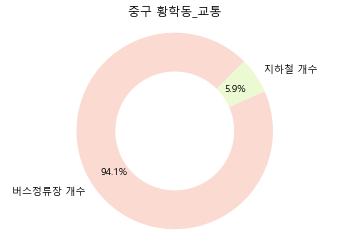

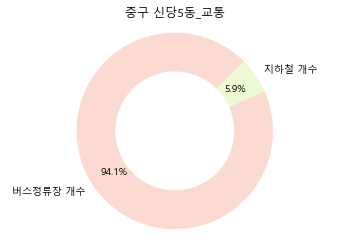

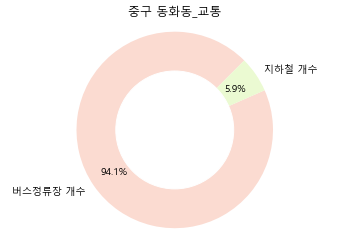

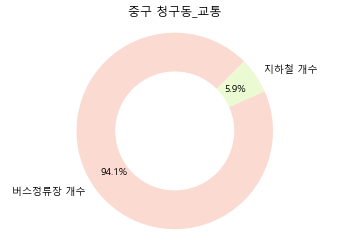

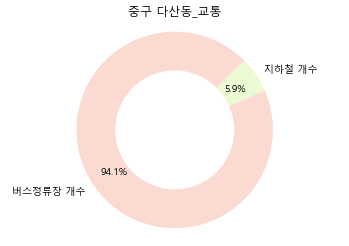

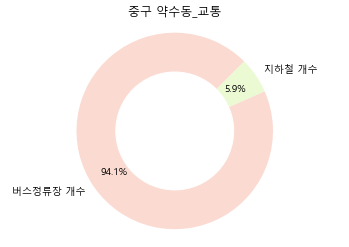

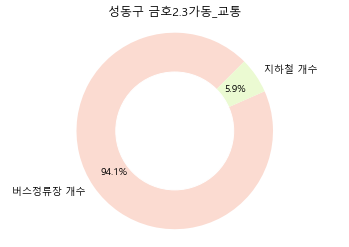

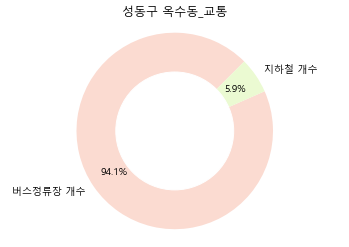

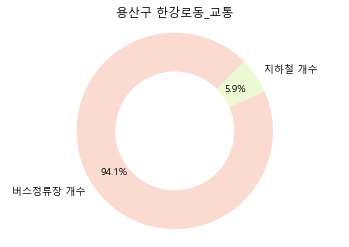

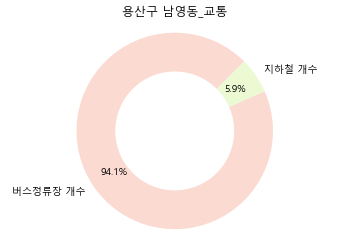

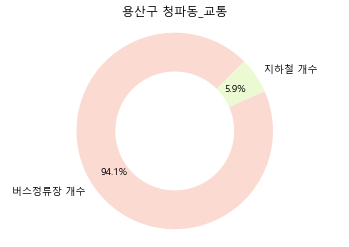

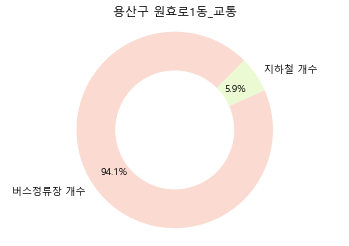

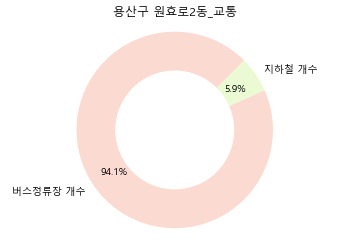

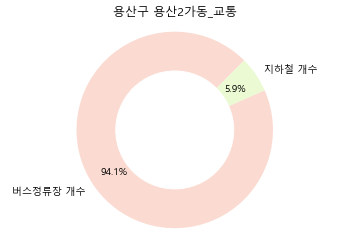

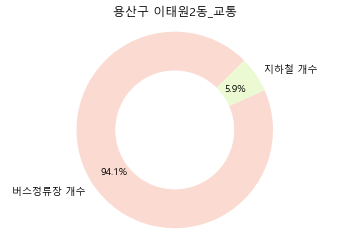

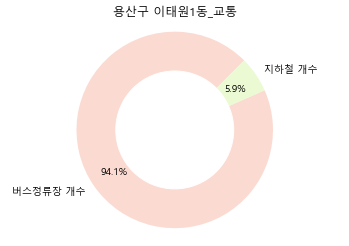

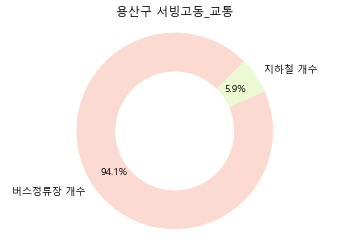

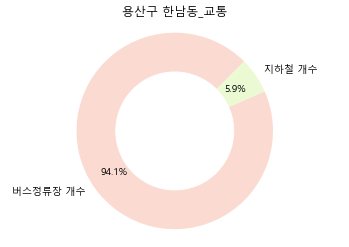

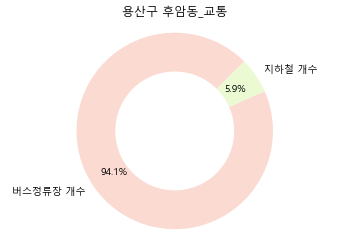

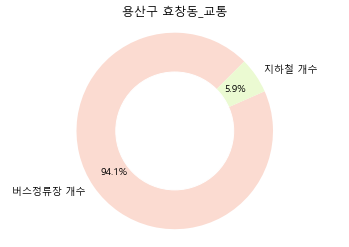

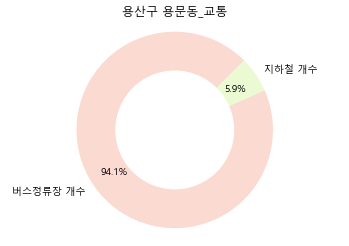

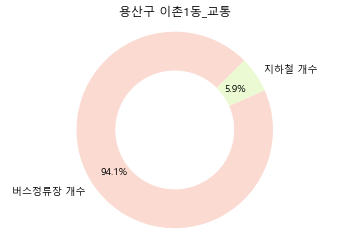

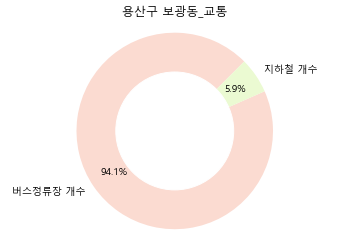

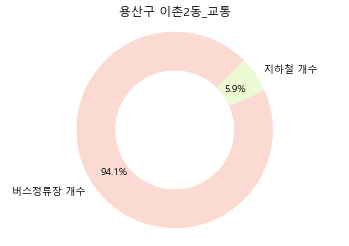

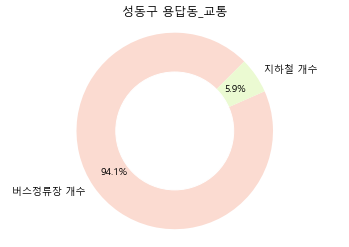

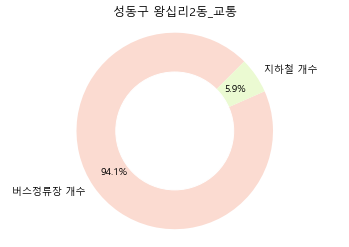

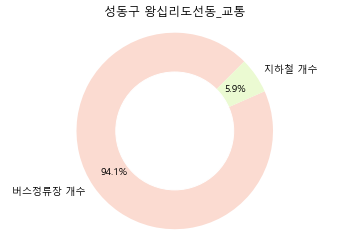

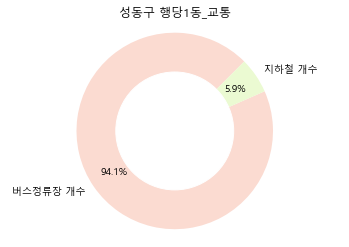

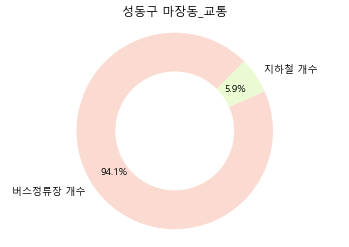

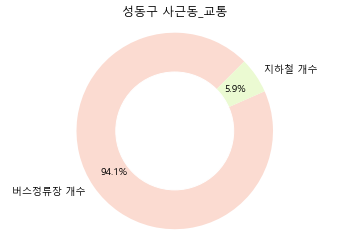

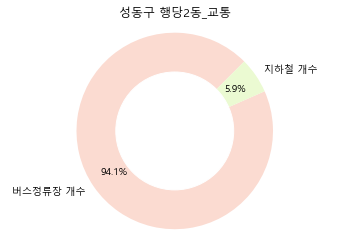

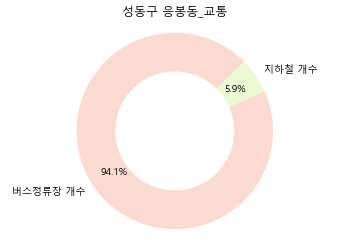

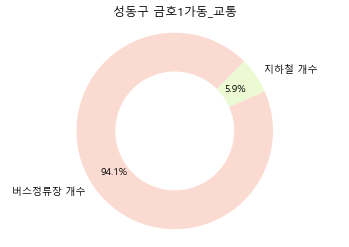

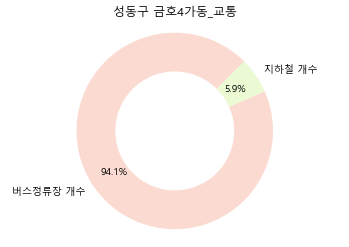

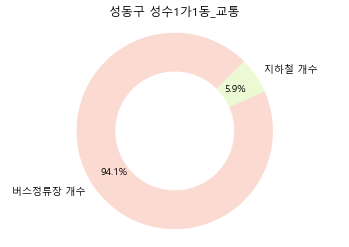

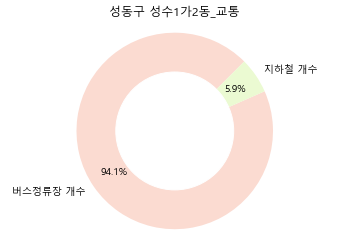

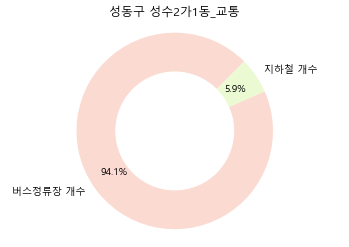

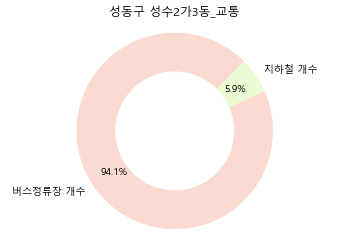

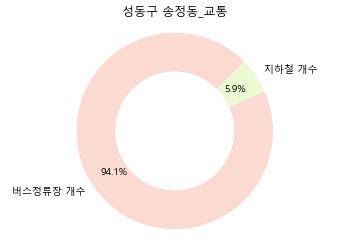

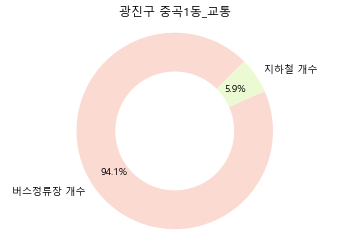

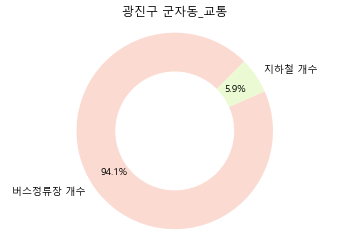

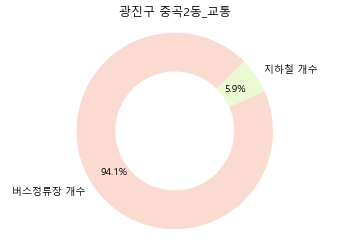

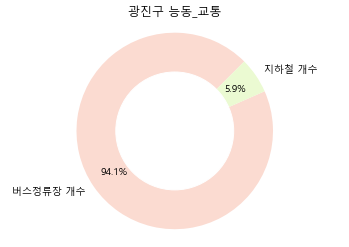

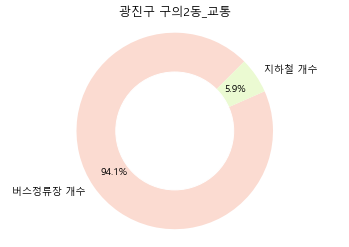

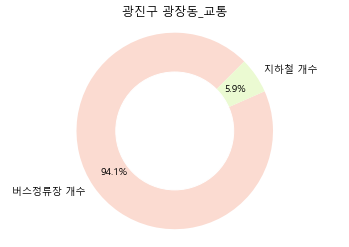

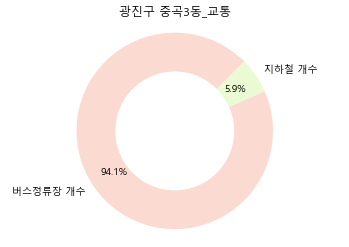

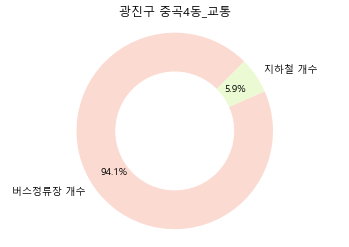

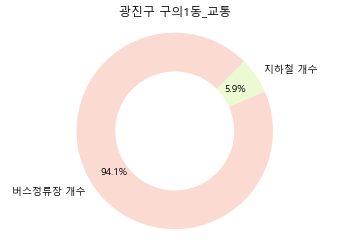

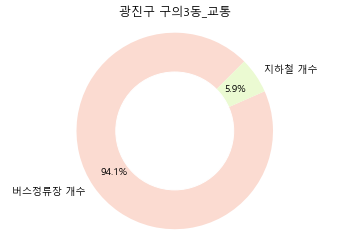

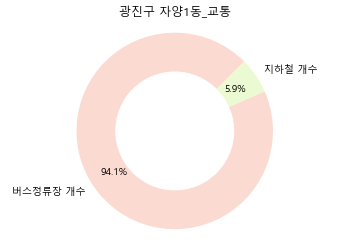

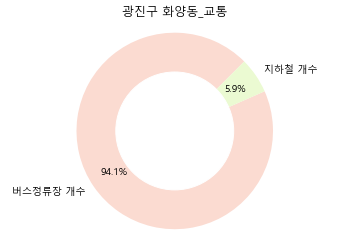

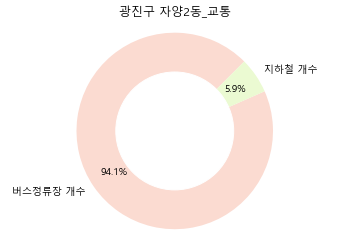

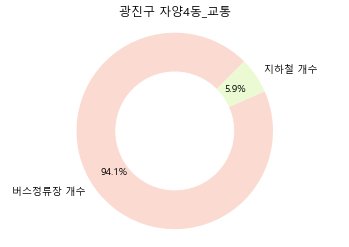

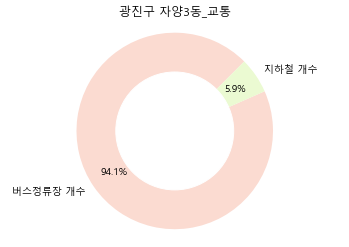

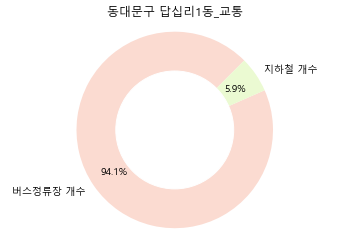

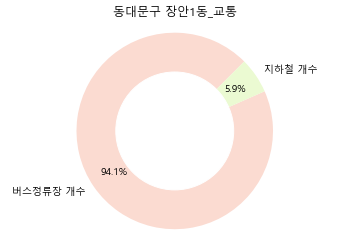

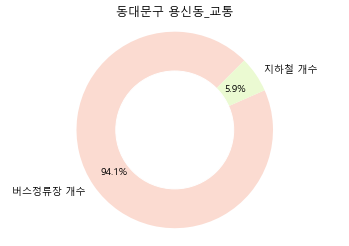

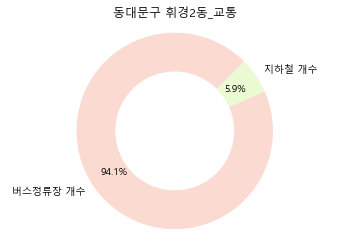

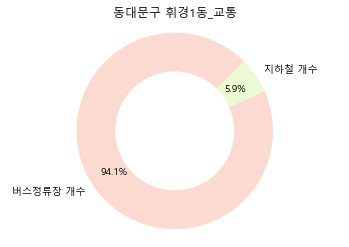

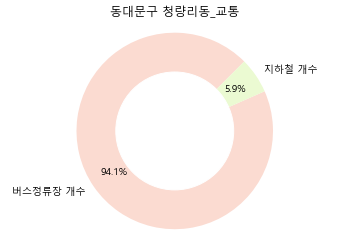

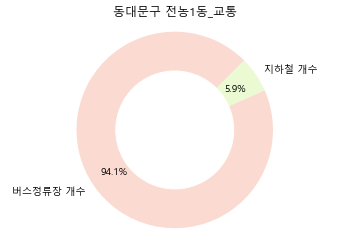

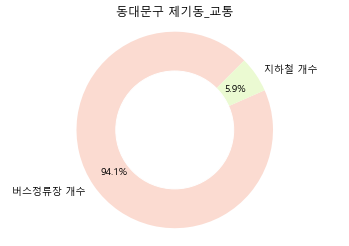

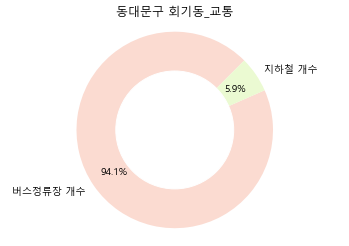

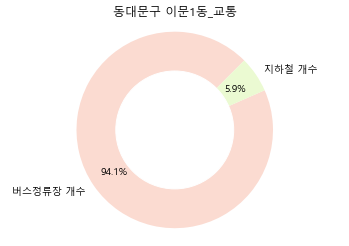

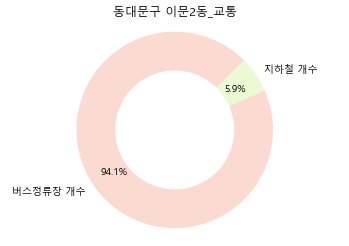

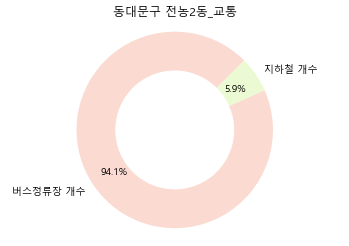

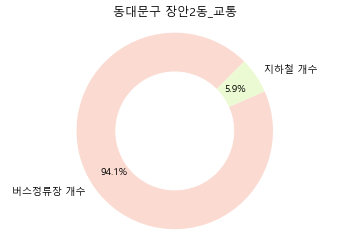

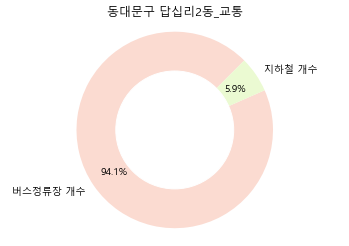

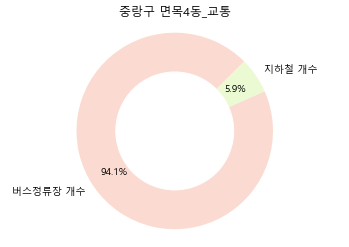

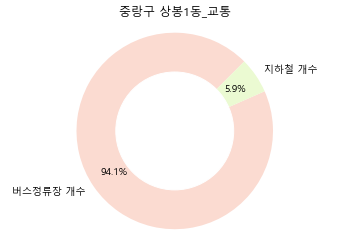

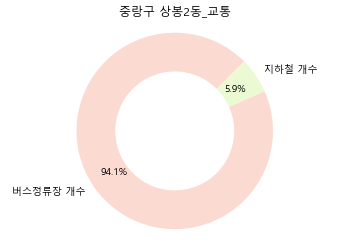

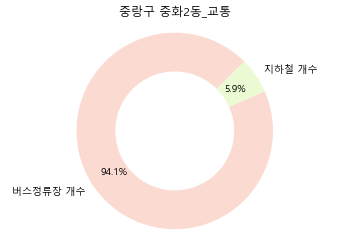

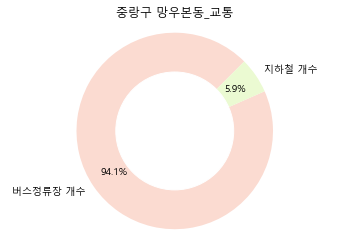

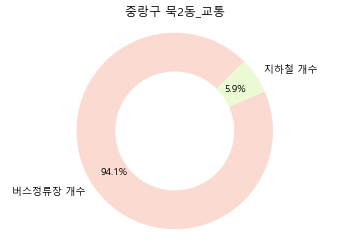

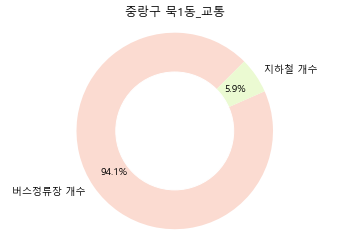

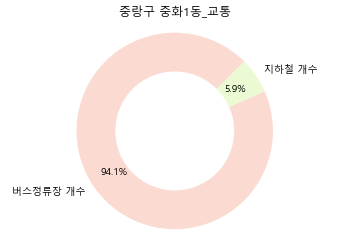

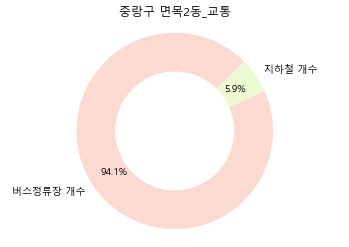

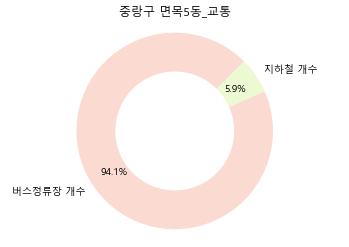

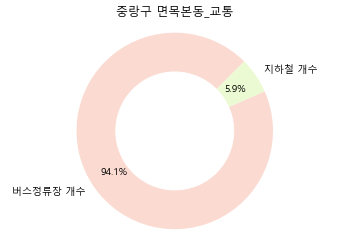

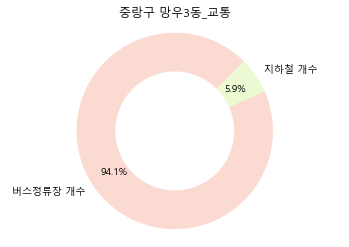

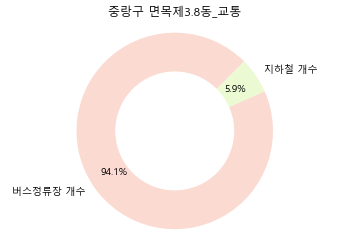

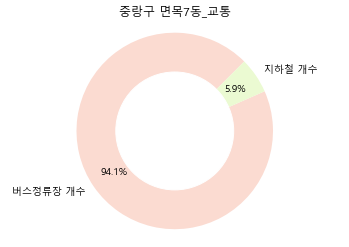

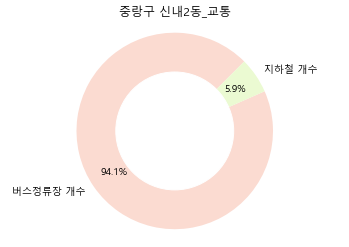

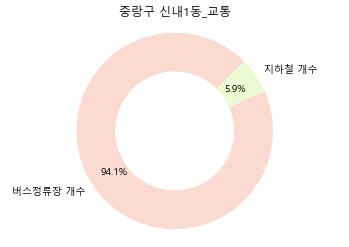

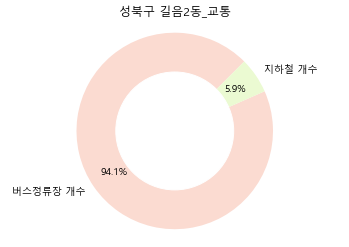

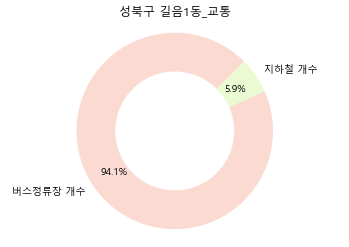

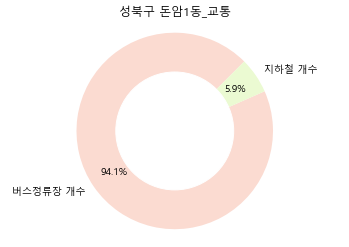

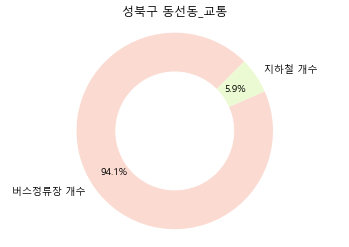

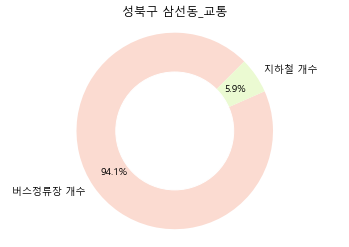

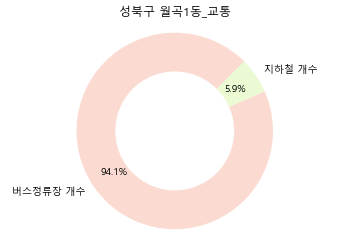

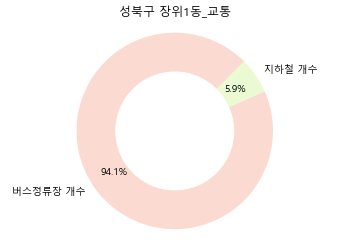

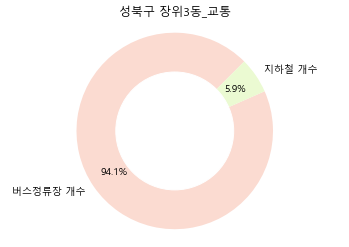

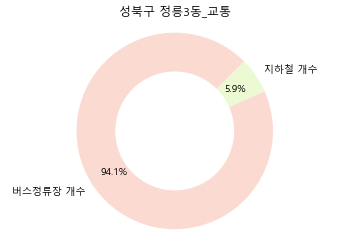

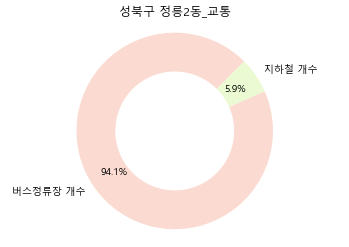

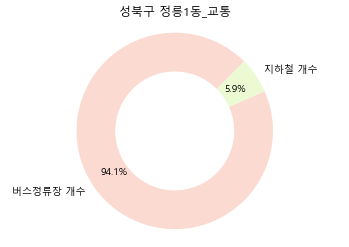

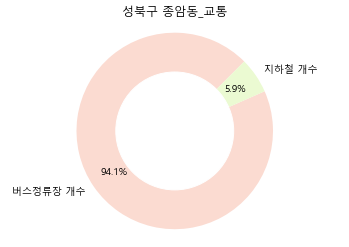

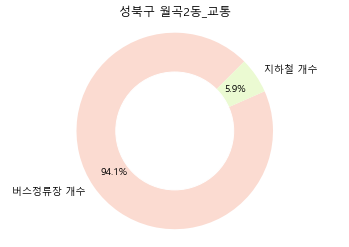

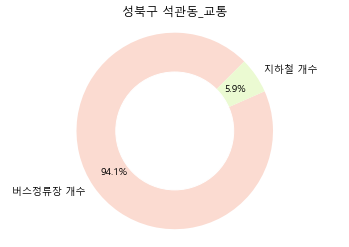

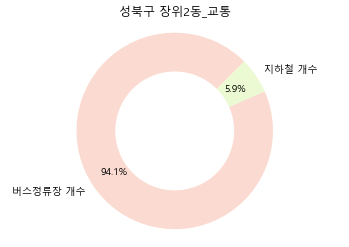

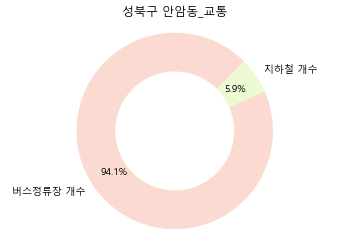

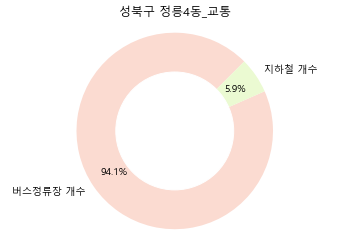

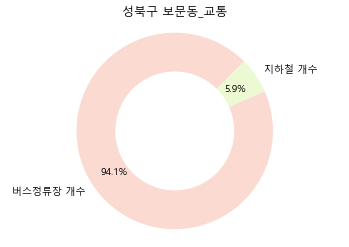

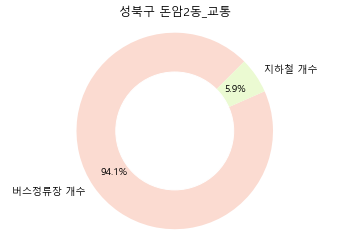

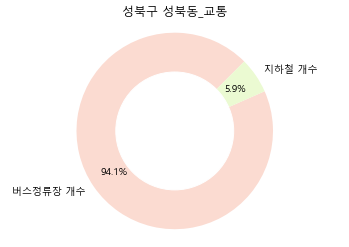

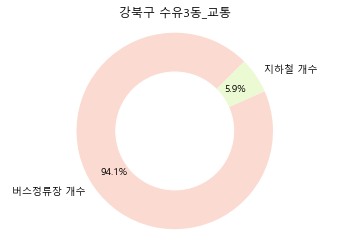

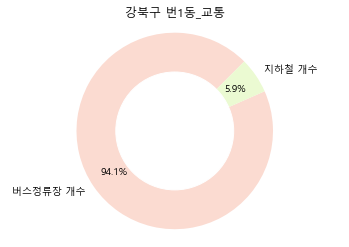

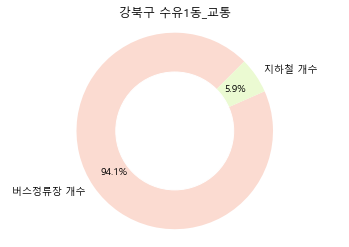

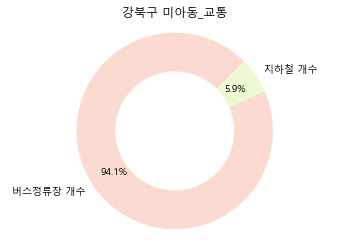

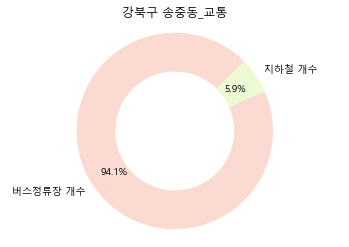

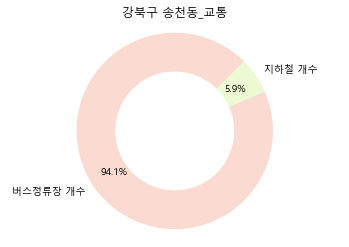

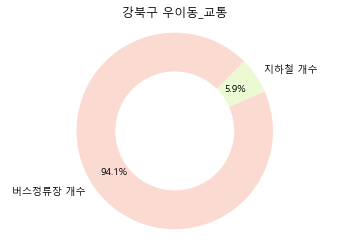

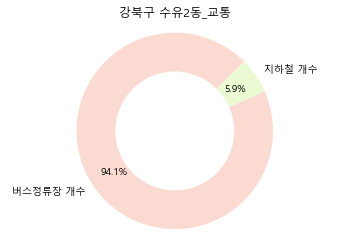

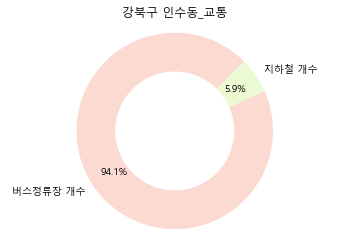

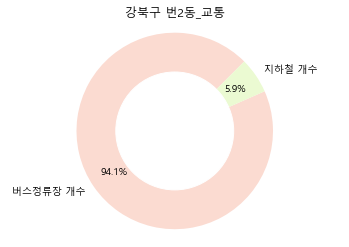

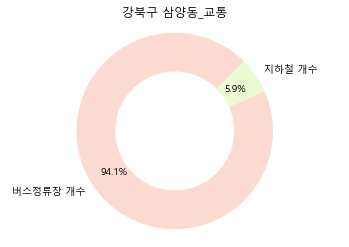

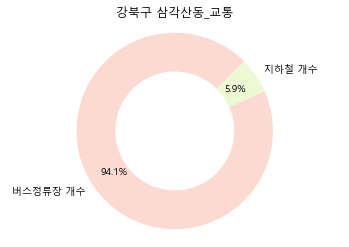

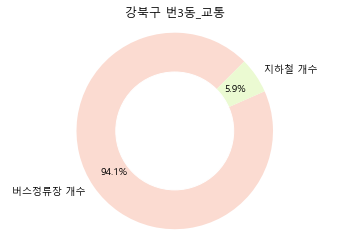

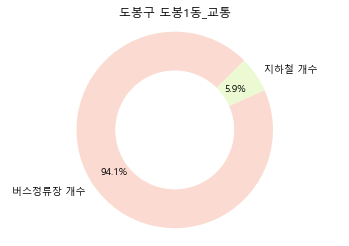

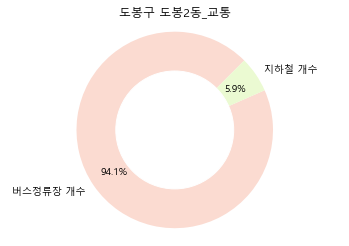

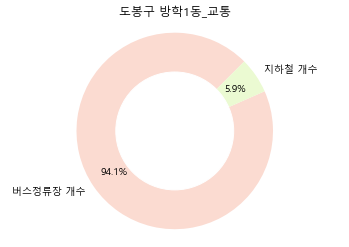

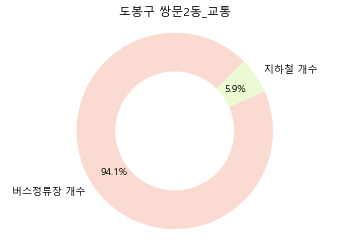

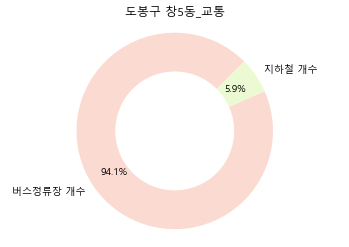

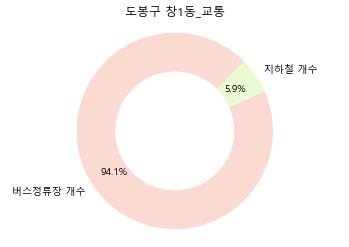

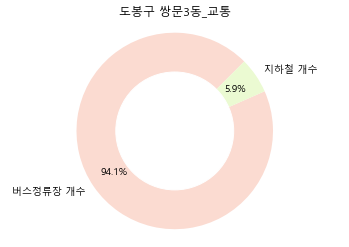

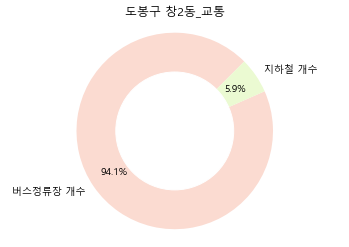

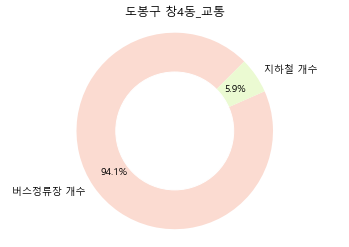

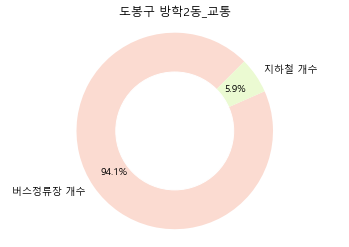

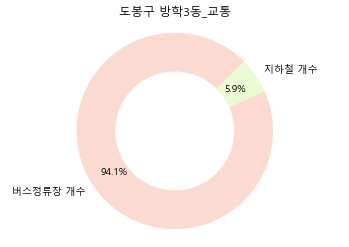

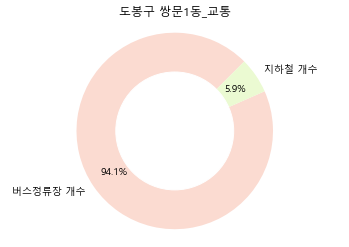

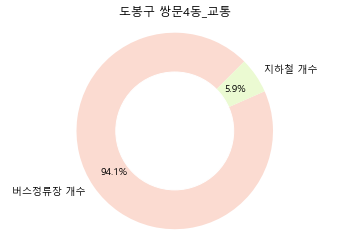

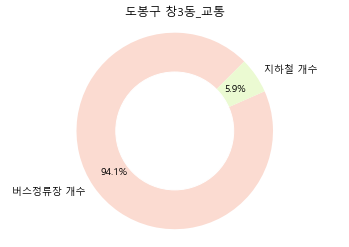

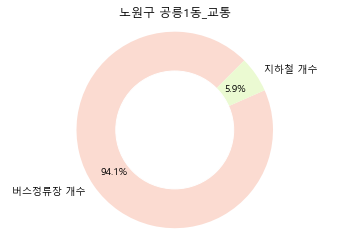

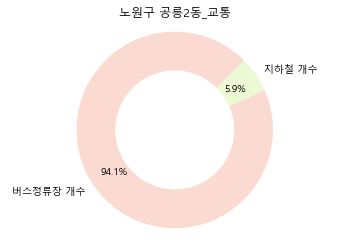

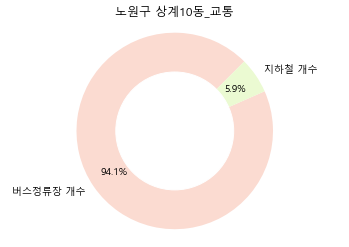

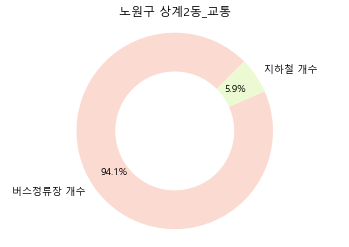

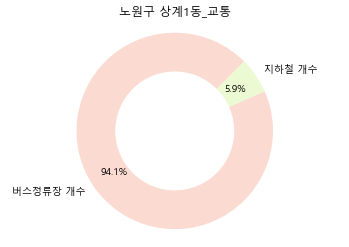

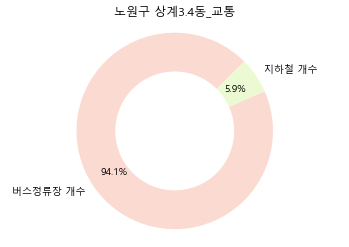

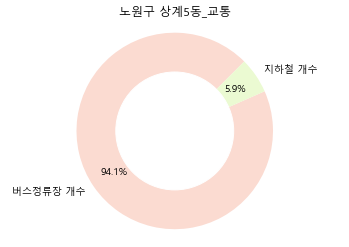

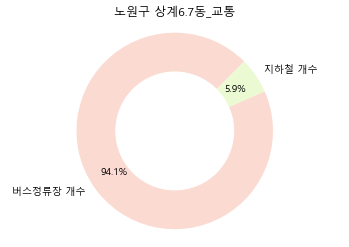

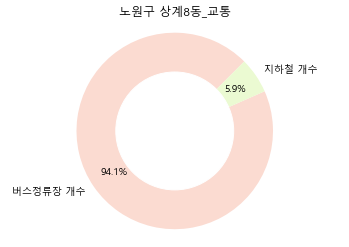

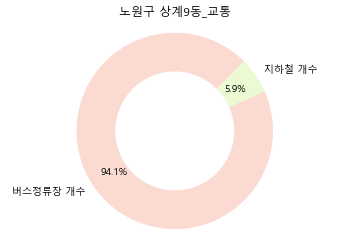

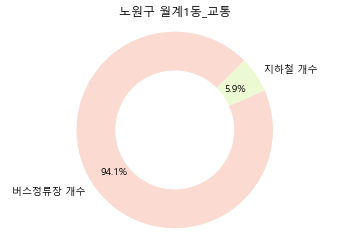

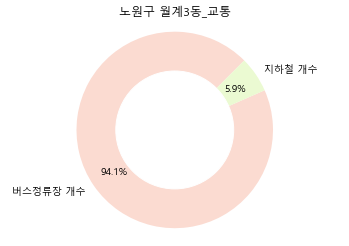

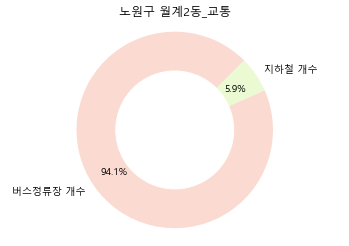

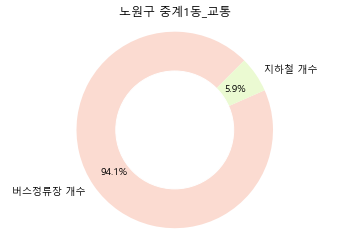

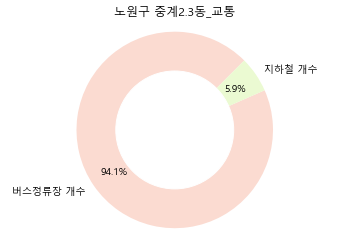

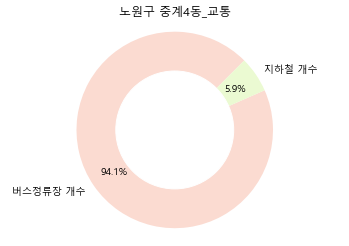

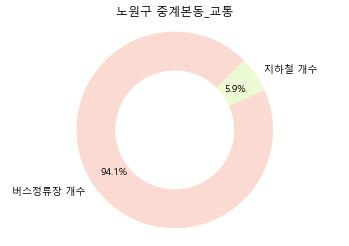

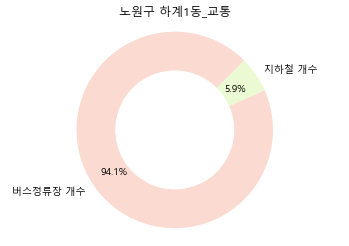

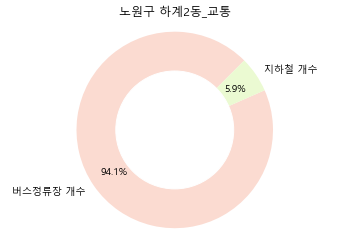

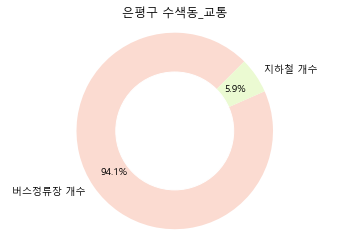

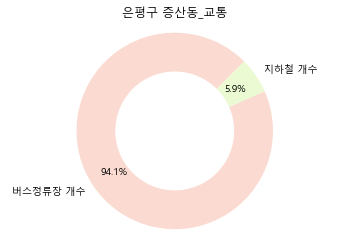

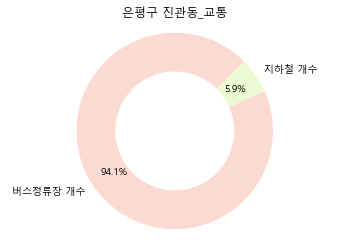

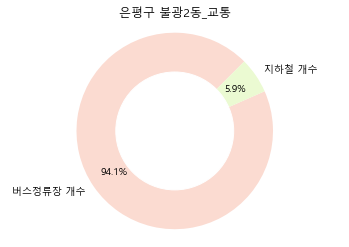

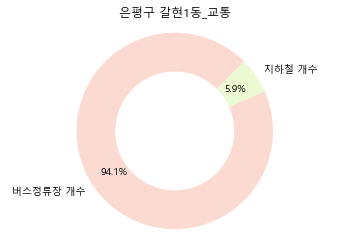

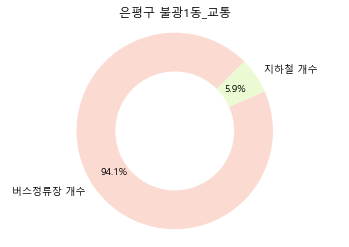

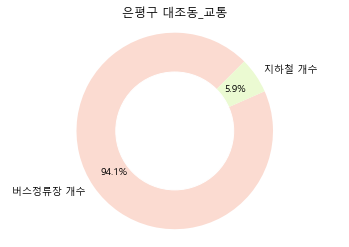

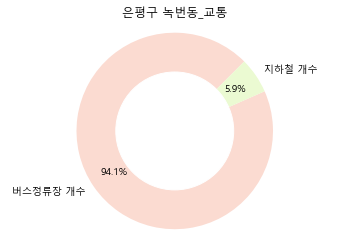

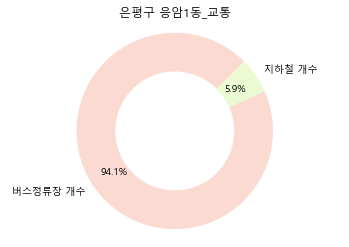

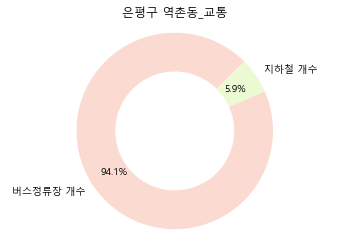

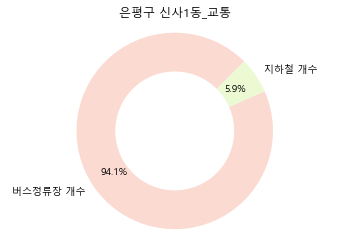

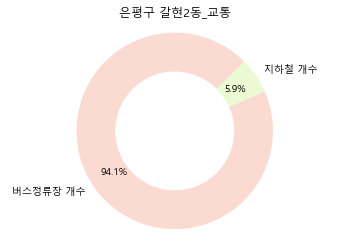

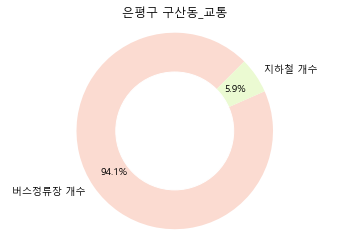

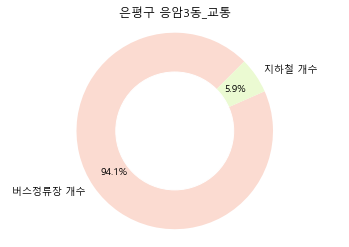

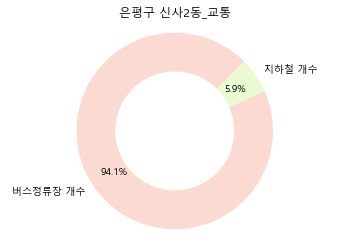

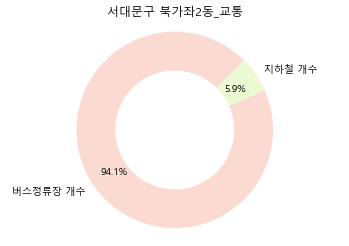

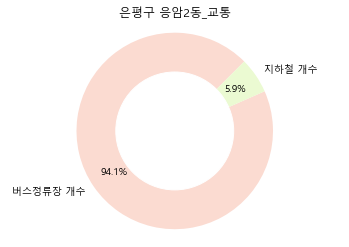

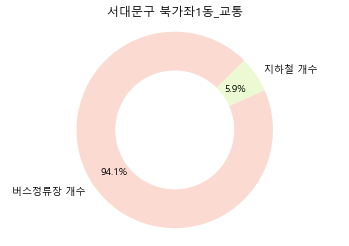

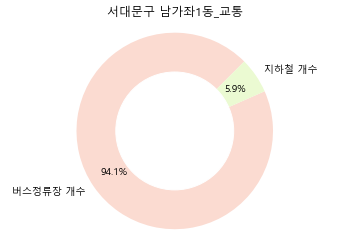

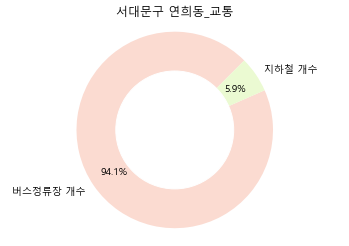

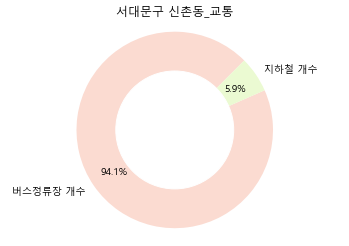

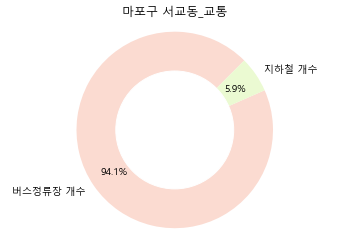

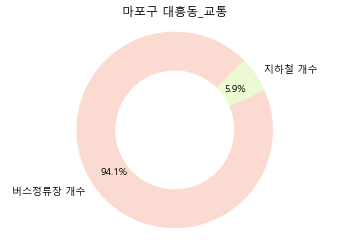

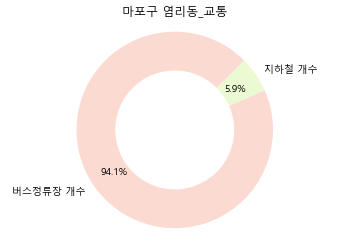

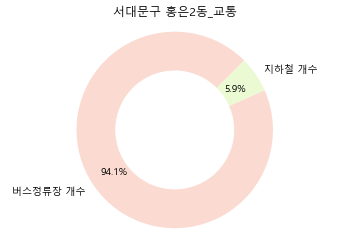

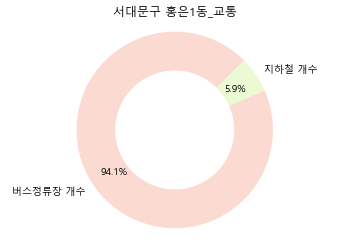

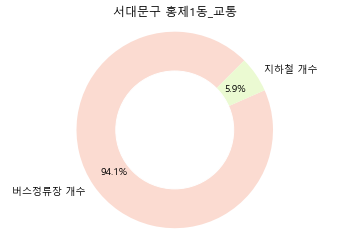

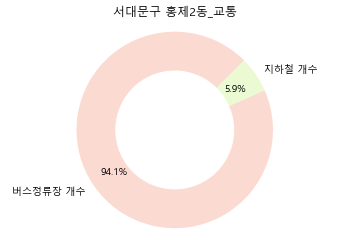

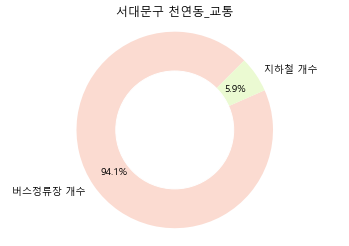

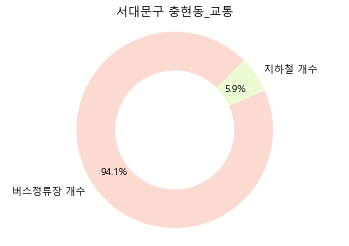

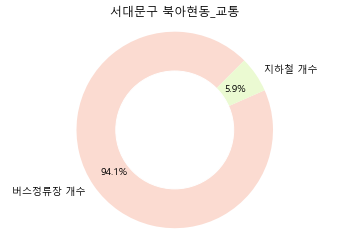

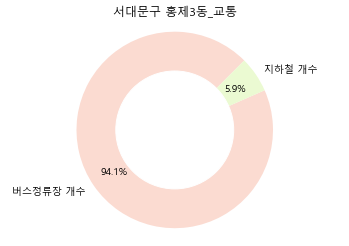

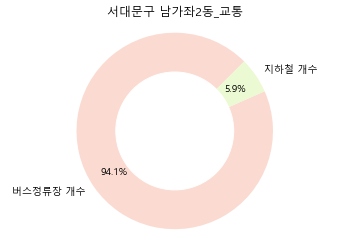

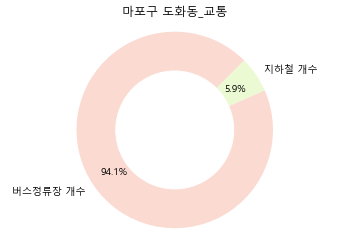

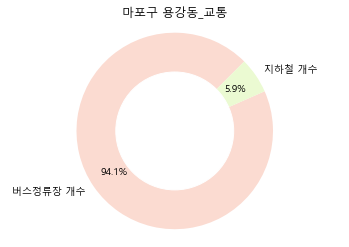

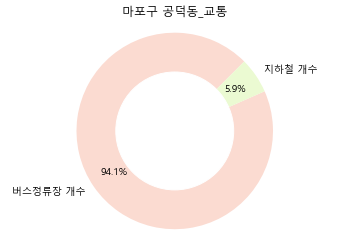

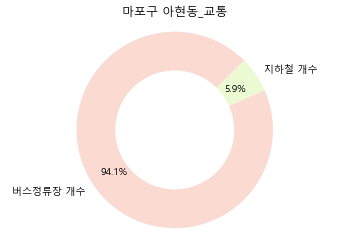

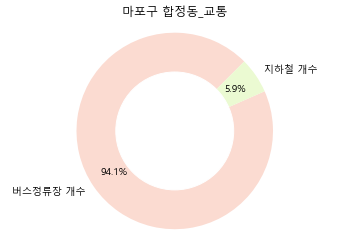

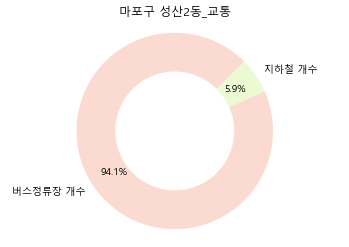

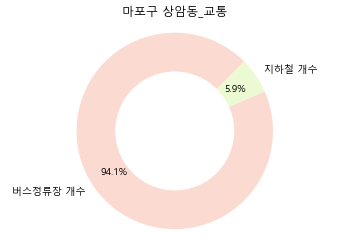

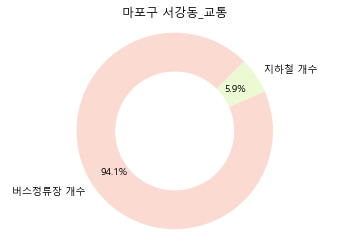

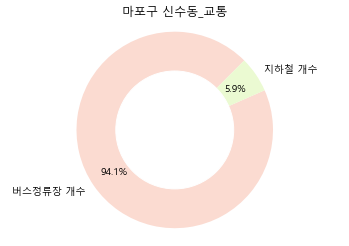

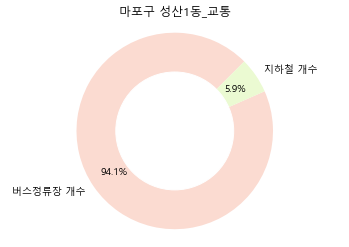

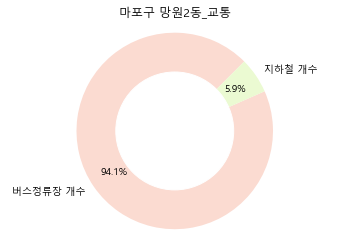

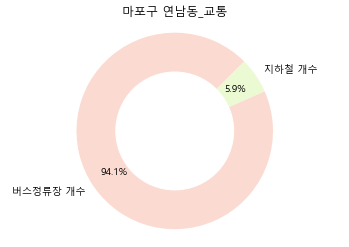

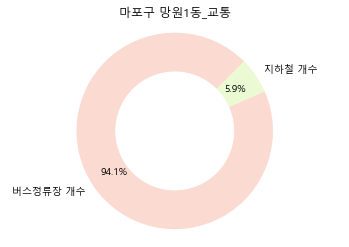

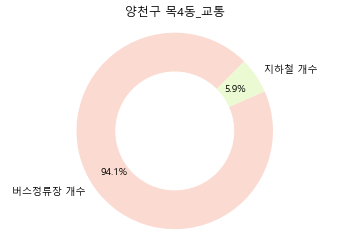

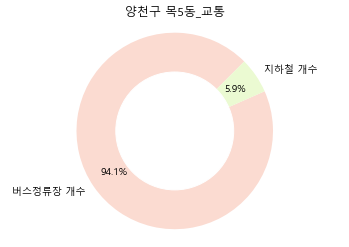

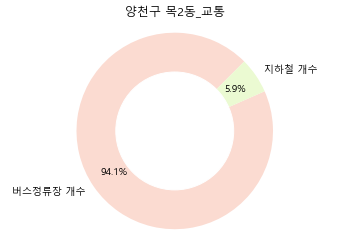

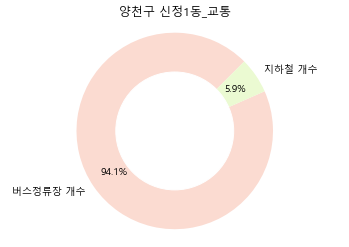

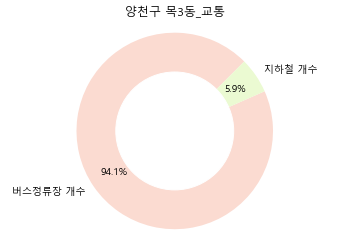

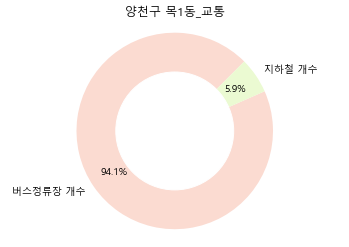

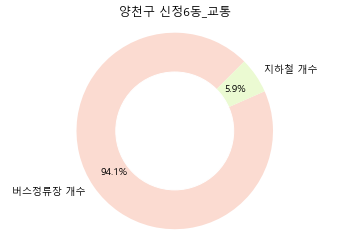

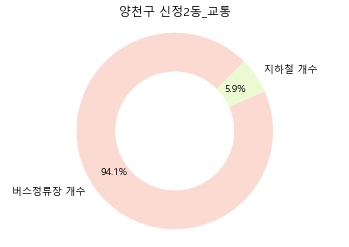

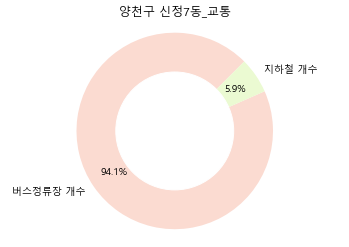

KeyboardInterrupt: 

In [116]:
bus_df = pd.read_csv('data/pie/버스정류장 2020(행정동, cp949).csv', encoding='cp949')
bus_df['구 행정동'] = bus_df['구'] + ' ' + bus_df['행정동']
bus_gu_dong = bus_df['구 행정동'].unique()
gu_dong_df = pd.DataFrame(bus_gu_dong, columns=['구 행정동'])

for gu in range(len(gu_dong_df)) :
    traffic(gu_dong_df.values[gu][0])